In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
columns_name = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num"
]
data= pd.read_csv("/content/processed.cleveland.data", header=None, names=columns_name)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [115]:
data.shape

(303, 14)

In [116]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Missing Attribute Values: Several.  Distinguished with value "?".

In [117]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [118]:
data=data.replace(to_replace="?", value=np.nan)

In [119]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [120]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")  # as it is categorical
data[["ca"]] = cat_imputer.fit_transform(data[["ca"]])
data[["thal"]] = cat_imputer.fit_transform(data[["thal"]])

In [121]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [122]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [123]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [124]:
data_encoded = pd.get_dummies(data, columns=["cp", "restecg", "slope", "ca", "thal"], drop_first=True, dtype=float)
y = (data_encoded["num"] > 0).astype(int)
data_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.model_selection import train_test_split
X_full = data_encoded.drop(columns=["num"])

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_s  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns,  index=X_test.index)
print("Train shape:", X_train_s.shape, " Test shape:", X_test_s.shape)


Train shape: (242, 20)  Test shape: (61, 20)


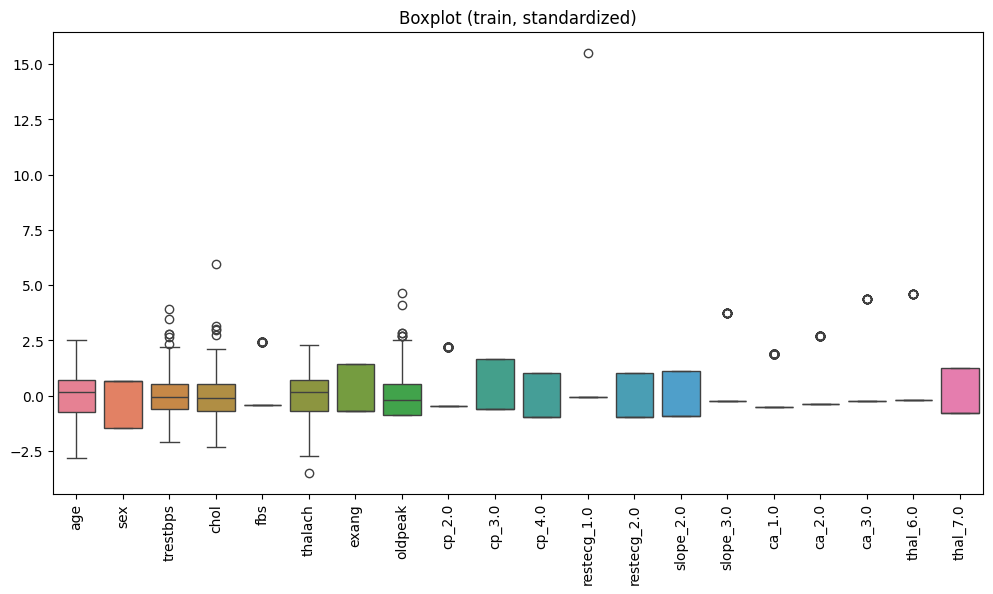

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_s)
plt.xticks(rotation=90)
plt.title("Boxplot (train, standardized)")
plt.show()

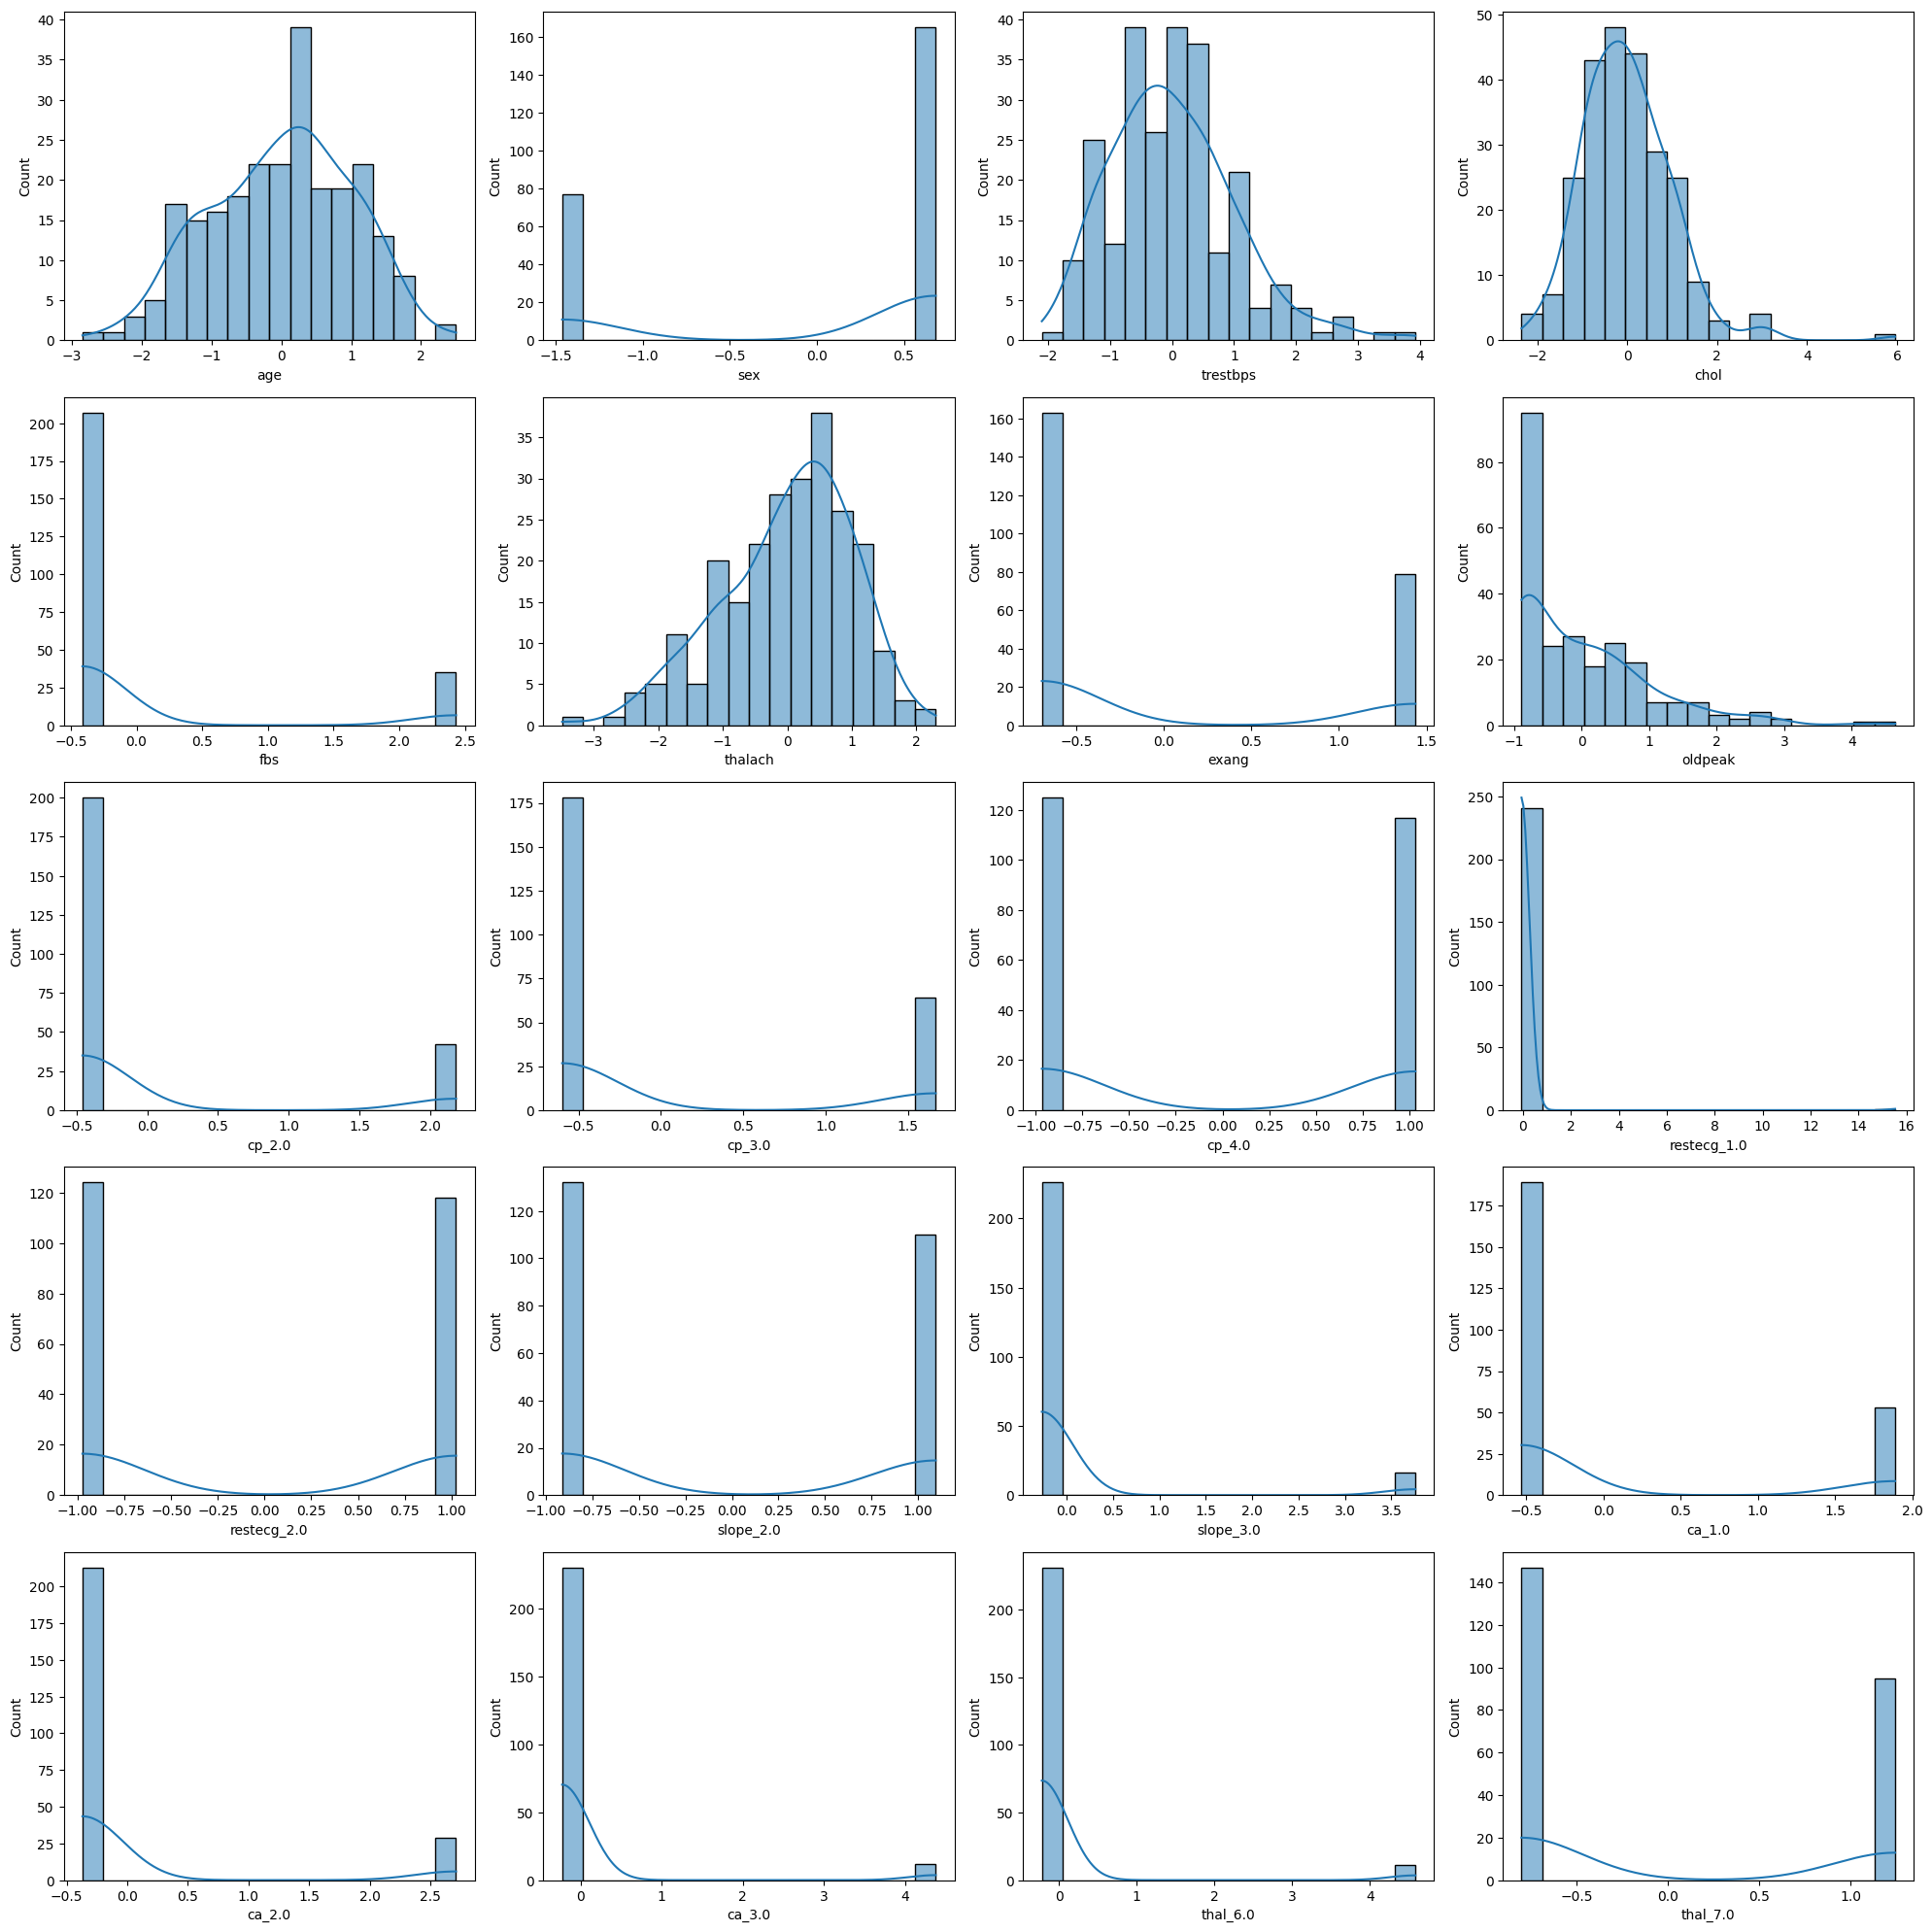

In [128]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_s.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(x=col, data=X_train_s, bins=18, kde=True)
plt.tight_layout()
plt.show()

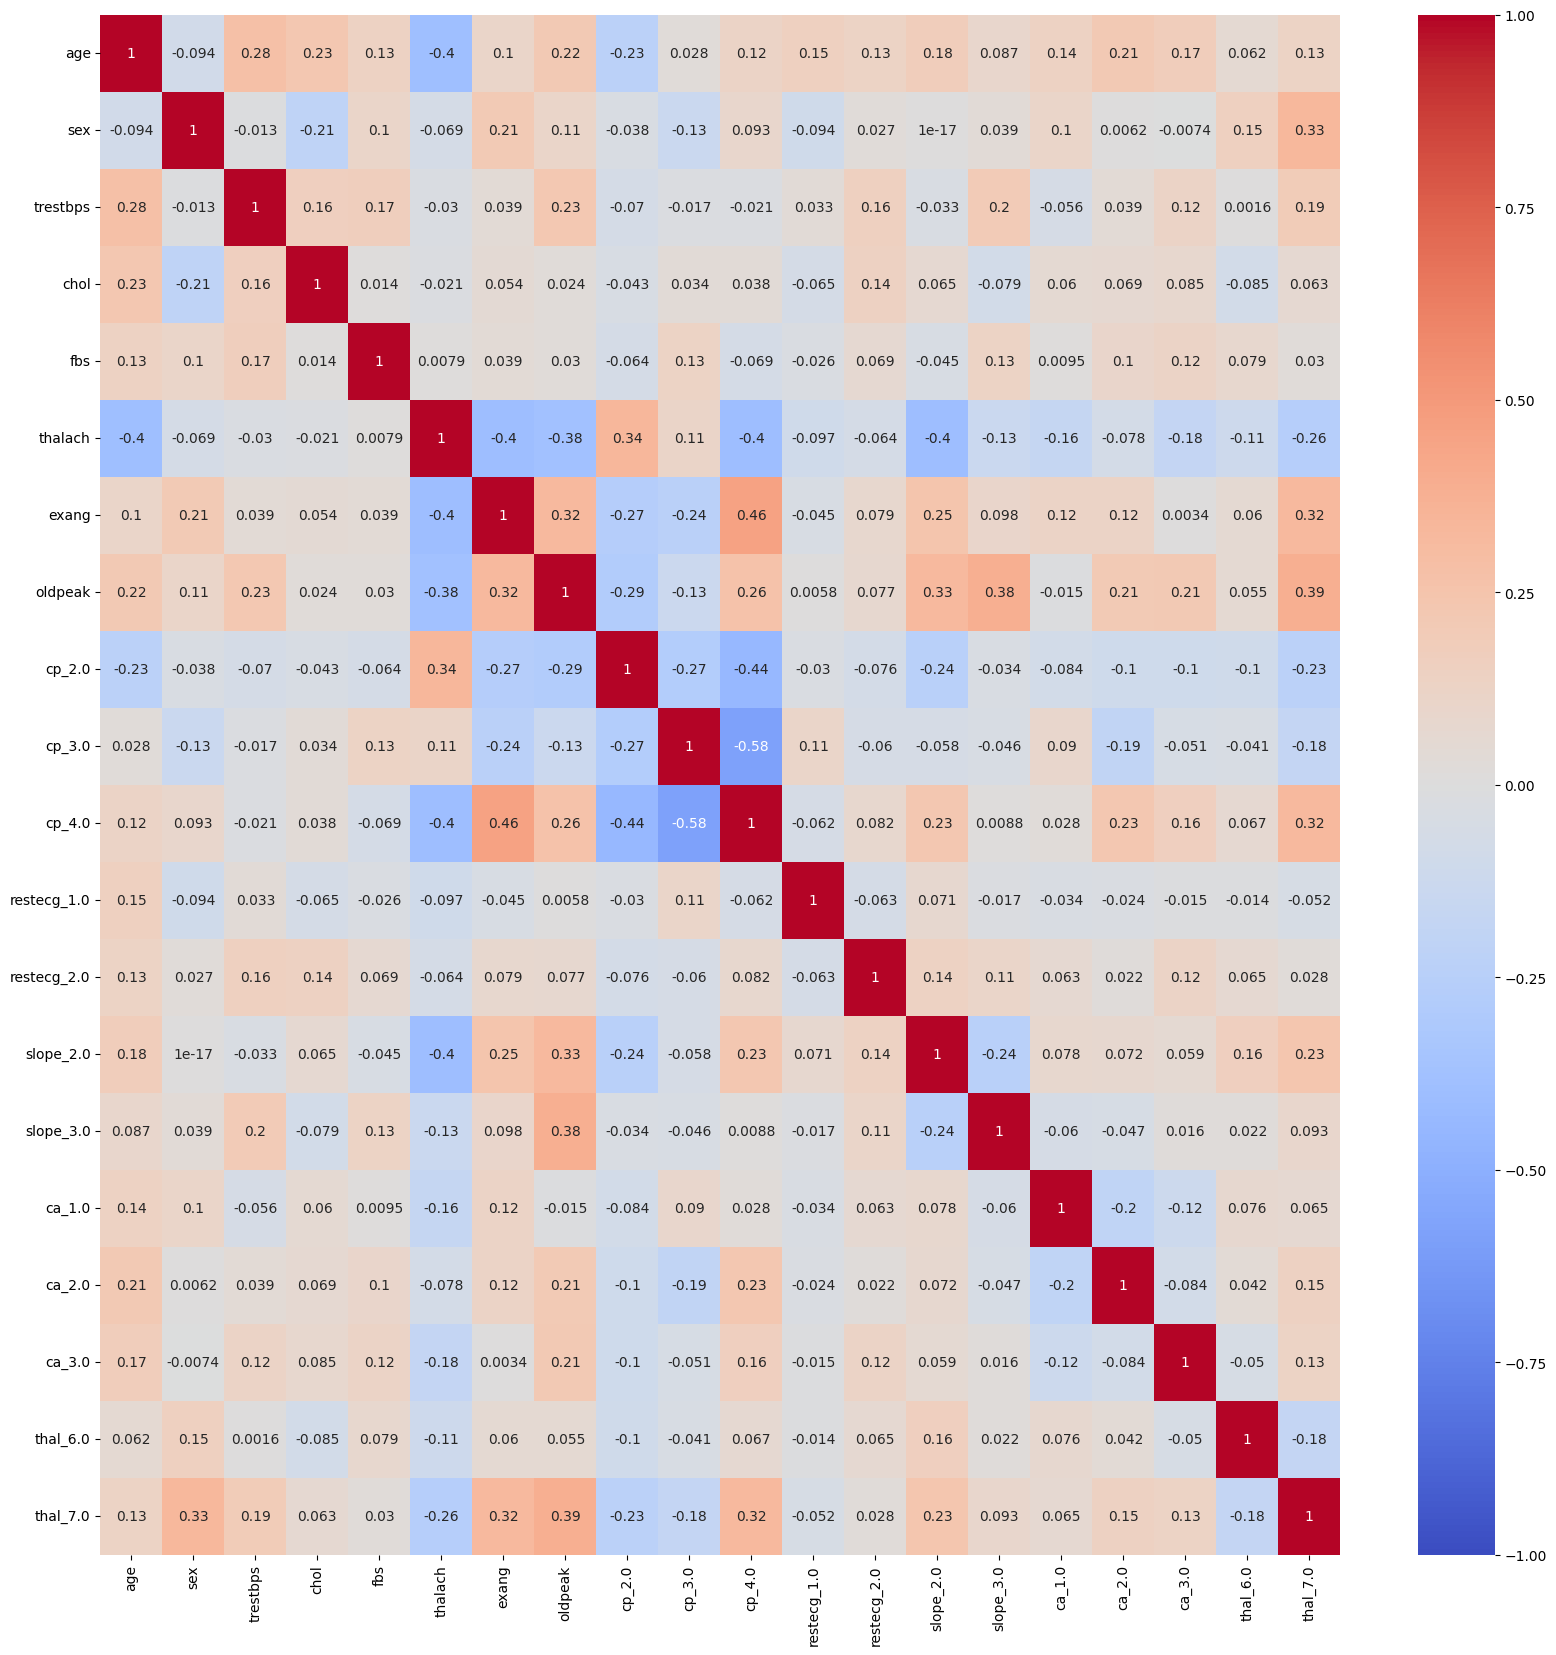

In [129]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_s.corr(), annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
plt.show()

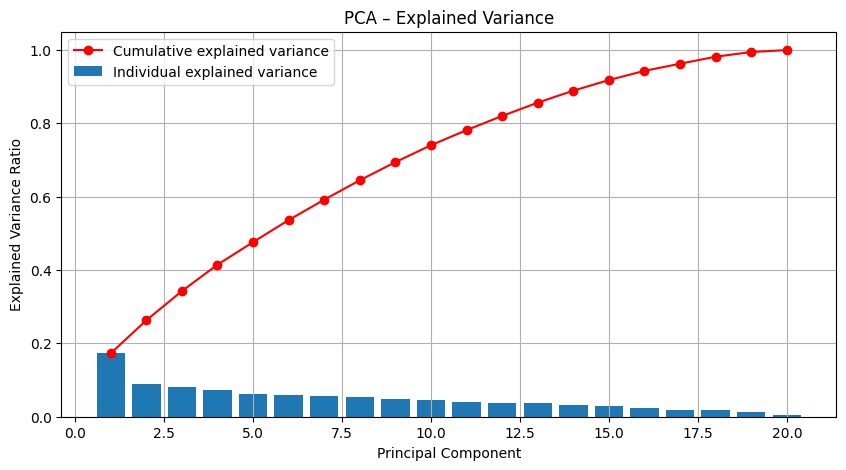

In [130]:
from sklearn.decomposition import PCA
pca= PCA()
X_pca=pca.fit_transform(X_train_s)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA – Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [131]:
n_components_95 = int(np.argmax(cumulative_variance >= 0.95) + 1)
print(f"Number of components to keep (95% variance): {n_components_95}")

pca_final = PCA(n_components=n_components_95)
X_train_pca = pca_final.fit_transform(X_train_s)
X_test_pca  = pca_final.transform(X_test_s)

print("Original shape:", X_train_s.shape, X_test_s.shape)
print("PCA shapes:", X_train_pca.shape, X_test_pca.shape)

Number of components to keep (95% variance): 17
Original shape: (242, 20) (61, 20)
PCA shapes: (242, 17) (61, 17)


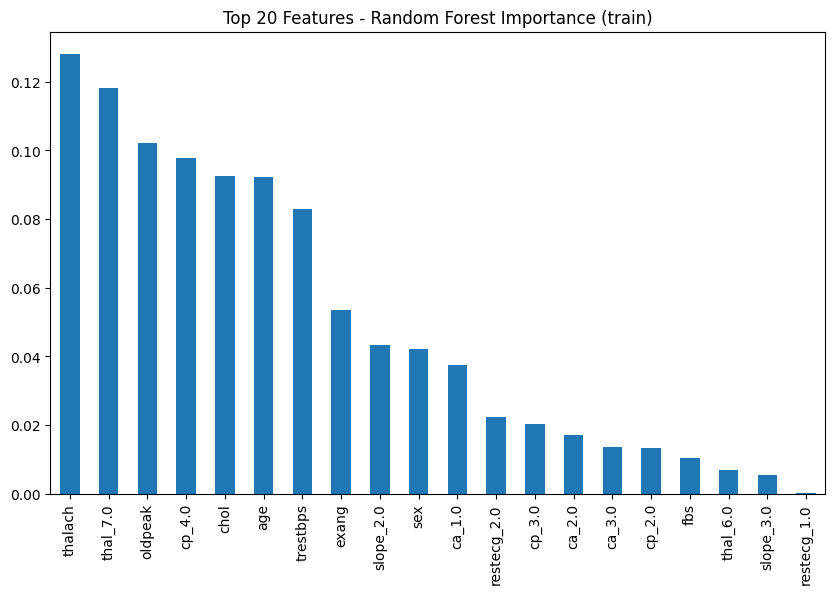

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train_s, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train_s.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(20).plot(kind='bar')
plt.title("Top 20 Features - Random Forest Importance (train)")
plt.show()

rf_features = list(importances.head(10).index)


In [133]:
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(X_train_s, y_train)
rfe_features = list(X_train_s.columns[rfe.support_])
print("RFE selected features:", rfe_features)


RFE selected features: ['sex', 'trestbps', 'cp_4.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0']


In [134]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm  = mm.transform(X_test)

chi2_selector = SelectKBest(score_func=chi2, k=min(8, X_train.shape[1]))
chi2_selector.fit(X_train_mm, y_train)
chi2_scores = pd.Series(chi2_selector.scores_, index=X_train.columns).sort_values(ascending=False)
chi2_features = list(chi2_scores.head(8).index)
print("Chi2 top features:", chi2_features)

Chi2 top features: ['thal_7.0', 'cp_4.0', 'exang', 'slope_2.0', 'cp_2.0', 'ca_2.0', 'cp_3.0', 'ca_1.0']


In [135]:
final_features = sorted(set(rf_features) | set(rfe_features) | set(chi2_features))
print(f"Final selected features ({len(final_features)}): {final_features}")

X_train_sel = X_train_s[final_features].copy()
X_test_sel  = X_test_s[final_features].copy()
X_train_sel.shape, X_test_sel.shape

Final selected features (15): ['age', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'chol', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang', 'oldpeak', 'sex', 'slope_2.0', 'thal_7.0', 'thalach', 'trestbps']


((242, 15), (61, 15))

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



def evaluation_model(clf, Xtr, Xte, ytr, yte, name):
    clf.fit(Xtr, ytr)
    y_pred = clf.predict(Xte)
    print(f"[{name}] Acc: {accuracy_score(yte, y_pred):.4f}")
    print(classification_report(yte, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(yte, y_pred))


baseline_clf = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
sel_clf      = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
pca_clf      = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)

evaluation_model(baseline_clf, X_train_s,   X_test_s,   y_train, y_test, "All standardized features")
evaluation_model(sel_clf,      X_train_sel, X_test_sel, y_train, y_test, "Selected features (RF ∪ RFE ∪ Chi2)")
evaluation_model(pca_clf,      X_train_pca, X_test_pca, y_train, y_test, "PCA components (≥95% EV)")

[All standardized features] Acc: 0.8525
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[28  5]
 [ 4 24]]
[Selected features (RF ∪ RFE ∪ Chi2)] Acc: 0.8852
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[29  4]
 [ 3 25]]
[PCA components (≥95% EV)] Acc: 0.8361
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79 

In [137]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

################### RandomForest ###########
evaluation_model(RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
           X_train_s, X_test_s, y_train, y_test, "Random Forest")
evaluation_model(RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
           X_train_sel, X_test_sel, y_train, y_test, "Selected features (RF ∪ RFE ∪ Chi2)")
evaluation_model(RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
           X_train_pca, X_test_pca, y_train, y_test, "PCA components (≥95% EV)")
################### GradientBoosting ###########
evaluation_model(GradientBoostingClassifier(n_estimators=100, learning_rate=0.9, max_depth=5, random_state=42),
           X_train_s, X_test_s, y_train, y_test, "Gradient Boosting")
################### SVM ###########
evaluation_model(SVC(kernel='rbf', C=10, gamma=0.133, probability=True, random_state=42),
           X_train_s, X_test_s, y_train, y_test, "SVM RBF")
evaluation_model(SVC(kernel='rbf', C=10, gamma=0.135, probability=True, random_state=42),
           X_train_sel, X_test_sel, y_train, y_test, "SVM Selected features (RF ∪ RFE ∪ Chi2)")
evaluation_model(SVC(kernel='rbf', C=10, gamma=0.15, probability=True, random_state=42),
           X_train_pca, X_test_pca, y_train, y_test, "SVM PCA components (≥95% EV)")



[Random Forest] Acc: 0.9016
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
[[29  4]
 [ 2 26]]
[Selected features (RF ∪ RFE ∪ Chi2)] Acc: 0.8689
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[28  5]
 [ 3 25]]
[PCA components (≥95% EV)] Acc: 0.9016
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90   

determine the k using elbow method

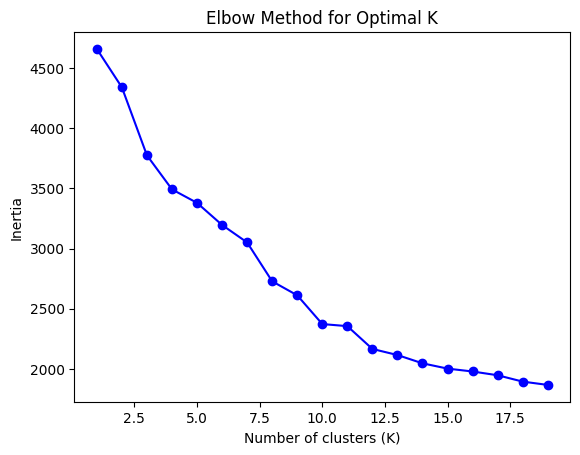

In [138]:
from sklearn.cluster import KMeans
wss=[]
K_range = range(1, 20)

for k in K_range:
  get_K=KMeans(n_clusters=k, random_state=42)
  get_K.fit(X_train_pca)
  wss.append(get_K.inertia_)
plt.plot(K_range, wss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

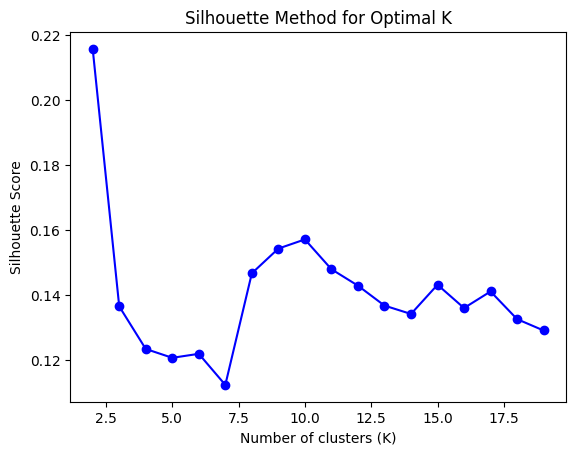

In [139]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_s)
    score = silhouette_score(X_train_s, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

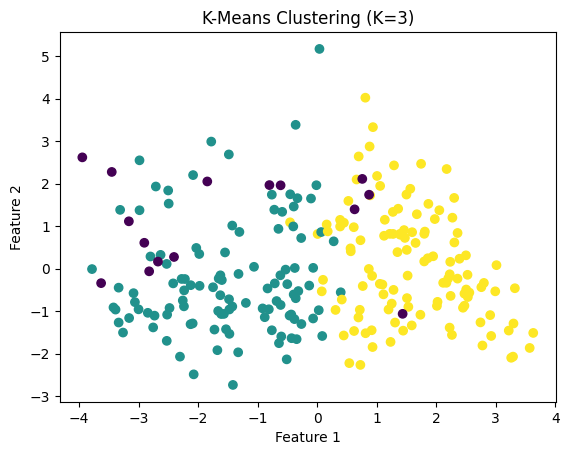

In [140]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

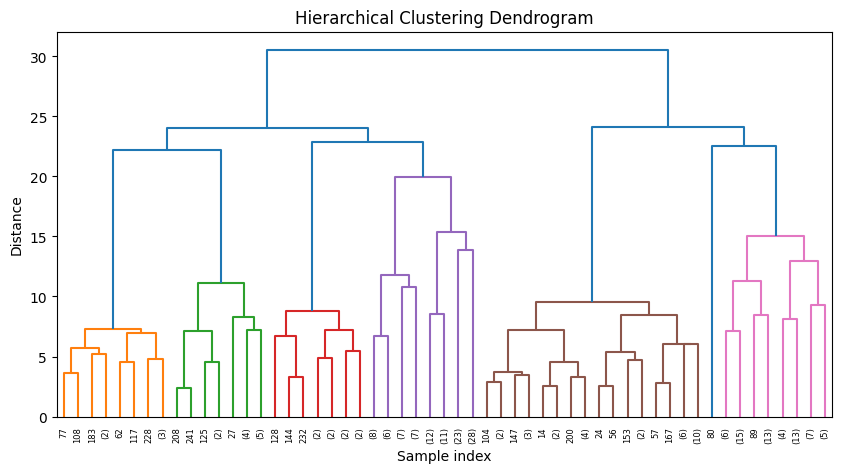

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage = linkage(X_train_pca, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

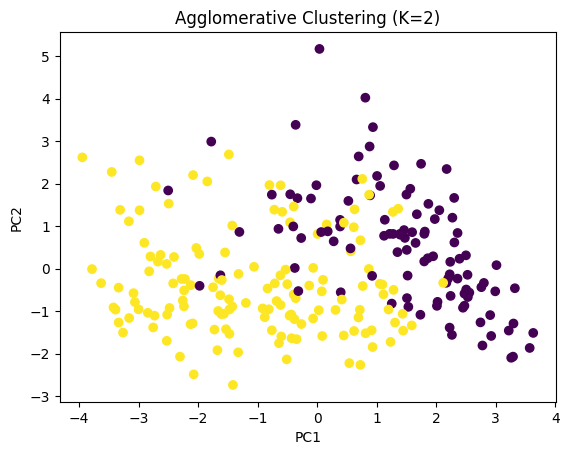

In [142]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title("Agglomerative Clustering (K=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [143]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Agglomerative
print("Agglomerative Clustering:")
print("ARI:", adjusted_rand_score(y_train, agg_labels))
print("NMI:", normalized_mutual_info_score(y_train, agg_labels))

# K-Means
print("\nK-Means Clustering:")
print("ARI:", adjusted_rand_score(y_train, kmeans_labels))
print("NMI:", normalized_mutual_info_score(y_train, kmeans_labels))


Agglomerative Clustering:
ARI: 0.17419913612801832
NMI: 0.14828697632420187

K-Means Clustering:
ARI: 0.2928394957021891
NMI: 0.2150753799324686


In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearchCV
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={"n_estimators":[100,200,300], "max_depth":[None,10,20]},cv=5, n_jobs=-1, scoring="accuracy"
).fit(X_train_s, y_train)
grid_acc = accuracy_score(y_test, grid.best_estimator_.predict(X_test_s))

# RandomizedSearchCV
rand = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions={
        "n_estimators": np.arange(50,401,50),
        "max_depth": [None,5,10,15,20],
        "min_samples_split": np.arange(2,11)
    },n_iter=20, cv=5, n_jobs=-1, scoring="accuracy", random_state=42
).fit(X_train_s, y_train)
rand_acc = accuracy_score(y_test, rand.best_estimator_.predict(X_test_s))

## Baseline
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
base_acc = accuracy_score(y_test,baseline_rf.predict(X_test))
# Compare
print(f"Baseline:        {base_acc:.4f}")
print(f"GridSearchCV:    {grid_acc:.4f}  | best {grid.best_params_}")
print(f"RandomizedSearch:{rand_acc:.4f}  | best {rand.best_params_}")

Baseline:        0.9016
GridSearchCV:    0.9016  | best {'max_depth': 10, 'n_estimators': 300}
RandomizedSearch:0.8852  | best {'n_estimators': np.int64(100), 'min_samples_split': np.int64(9), 'max_depth': None}


In [145]:
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
DATA_PATH = "processed.cleveland.data"

ALL_INPUT = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal","num"
]
REQUIRED_INPUT = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal"
]
NUMERIC_COLS = ["age","trestbps","chol","thalach","oldpeak","sex","fbs","exang"]
CAT_COLS     = ["cp","restecg","slope","ca","thal"]

df = pd.read_csv(DATA_PATH, header=None, names=ALL_INPUT)
df = df.replace("?", np.nan)
y = (pd.to_numeric(df["num"], errors="coerce") > 0).astype(int)
X = df.drop(columns=["num"]).copy()

class SchemaCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_ = X.copy()
        X_.columns = X_.columns.str.strip()
        for c in REQUIRED_INPUT:
            if c not in X_.columns:
                X_[c] = np.nan

        X_ = X_[REQUIRED_INPUT]
        for c in NUMERIC_COLS:
            X_[c] = pd.to_numeric(X_[c], errors="coerce")

        for c in CAT_COLS:
            if X_[c].isna().all():
                X_[c] = "missing"
        return X_

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler()),
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)),
])
pre = ColumnTransformer([
    ("num", num_pipe, NUMERIC_COLS),
    ("cat", cat_pipe, CAT_COLS),
], remainder="drop", verbose_feature_names_out=False)

production_pipe = Pipeline([
    ("clean", SchemaCleaner()),
    ("pre", pre),
    ("model", RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

production_pipe.fit(X_train, y_train)
acc = accuracy_score(y_test, production_pipe.predict(X_test))
print(f"Accuracy: {acc:.4f}")

joblib.dump(production_pipe, "heart_pipeline.pkl")
print("Saved → heart_pipeline.pkl")


Accuracy: 0.9016
Saved → heart_pipeline.pkl


In [146]:
app_code = r"""
import os, json
import numpy as np
import pandas as pd
import streamlit as st
import joblib
from sklearn.base import BaseEstimator, TransformerMixin

st.set_page_config(page_title="Heart Disease Prediction UI", page_icon="❤️", layout="wide")
st.title("❤️ Heart Disease Prediction")

# ====== SCHEMA (must match training) ======
REQUIRED_INPUT = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal"
]
NUMERIC_COLS = ["age","trestbps","chol","thalach","oldpeak","sex","fbs","exang"]
CAT_COLS     = ["cp","restecg","slope","ca","thal"]
RENAME_MAP = {}

# Human-readable labels
LABELS = {
    "sex":   {0: "Female", 1: "Male"},
    "cp":    {1: "Typical angina", 2: "Atypical angina", 3: "Non-anginal pain", 4: "Asymptomatic"},
    "restecg": {0: "Normal", 1: "ST-T abnormality", 2: "Left ventricular hypertrophy (LVH)"},
    "exang": {0: "No", 1: "Yes"},
    "slope": {1: "Upsloping", 2: "Flat", 3: "Downsloping"},
    "thal":  {3: "Normal", 6: "Fixed defect", 7: "Reversible defect"},
    "fbs":   {0: "≤ 120 mg/dl", 1: "> 120 mg/dl"},
}
INV = {k:{v:k for k,v in d.items()} for k,d in LABELS.items()}

# ====== Custom cleaner (must exist for pickle) ======
class SchemaCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X_ = X.copy()
        if hasattr(X_, "replace"):
            X_.replace("?", np.nan, inplace=True)
        X_.columns = X_.columns.str.strip()
        if RENAME_MAP:
            X_.rename(columns=RENAME_MAP, inplace=True)
        for c in REQUIRED_INPUT:
            if c not in X_.columns:
                X_[c] = np.nan
        X_ = X_[REQUIRED_INPUT]
        for c in NUMERIC_COLS:
            X_[c] = pd.to_numeric(X_[c], errors="coerce")
        for c in CAT_COLS:
            if X_[c].isna().all():
                X_[c] = "missing"
        return X_

def prepare_for_model(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = df.columns.str.strip()
    if RENAME_MAP:
        df.rename(columns=RENAME_MAP, inplace=True)
    for c in REQUIRED_INPUT:
        if c not in df.columns:
            df[c] = np.nan
    return df[REQUIRED_INPUT]

# ====== Load model (no auto predict) ======
@st.cache_resource(show_spinner=False)
def load_model(path: str = "heart_pipeline.pkl"):
    if not os.path.exists(path):
        return None, f"Model file '{path}' was not found."
    try:
        mdl = joblib.load(path)  # resolves SchemaCleaner
        return mdl, None
    except Exception as e:
        return None, f"Failed to load model: {e}"

model, model_err = load_model()
if model_err:
    st.warning(model_err)

# ====== Optional CSV for schema/auto-fill only (no auto prediction) ======
st.sidebar.header("📁 Optional CSV")
uploaded = st.sidebar.file_uploader("Upload CSV (optional)", type=["csv"])
df = None
target_col = None
if uploaded is not None:
    try:
        df = pd.read_csv(uploaded)
        st.sidebar.success(f"Loaded data with shape {df.shape}")
        cols = list(df.columns)
        target_col = st.sidebar.selectbox("Target column (ignored for prediction)", options=["(none)"] + cols, index=0)
    except Exception as e:
        st.sidebar.error(f"Error reading CSV: {e}")

# ====== Input mode (no auto compute) ======
st.subheader("⚙️ Enter Information & Press **Get Diagnosis**")

input_mode = st.radio("Input mode", ["Manual input", "Pick a row from uploaded data"], horizontal=True)

# Prefill helpers
def pick_default(col, fallback):
    if df is not None and col in (df.columns if target_col is None else [c for c in df.columns if c != target_col]) and pd.api.types.is_numeric_dtype(df[col]):
        vals = pd.to_numeric(df[col], errors="coerce")
        if vals.notna().any():
            return float(vals.median())
    return fallback

# ====== FORM: user edits then presses a button ======
with st.form("predict_form", clear_on_submit=False):
    if input_mode == "Pick a row from uploaded data":
        if df is None:
            st.warning("Upload a CSV first to use this mode.")
            st.stop()
        idx = st.number_input("Row index", min_value=0, max_value=max(0, len(df)-1), value=0, step=1)
        row = df.iloc[[idx]].copy()
        if target_col and target_col in row.columns and target_col != "(none)":
            row = row.drop(columns=[target_col])

        # Extract defaults from row (fallbacks if missing)
        def get_row_val(col, fallback=None):
            return row.iloc[0].get(col, fallback) if col in row.columns else fallback

        # NUMERIC
        age      = st.number_input("Age (years)", value=float(get_row_val("age", pick_default("age", 50.0)) or 50.0))
        trestbps = st.number_input("Resting blood pressure (mm Hg)", value=float(get_row_val("trestbps", pick_default("trestbps", 130.0)) or 130.0))
        chol     = st.number_input("Serum cholesterol (mg/dl)", value=float(get_row_val("chol", pick_default("chol", 240.0)) or 240.0))
        thalach  = st.number_input("Max heart rate achieved", value=float(get_row_val("thalach", pick_default("thalach", 150.0)) or 150.0))
        oldpeak  = st.number_input("ST depression (oldpeak)", value=float(get_row_val("oldpeak", pick_default("oldpeak", 1.0)) or 1.0))
        ca       = st.number_input("Major vessels colored by fluoroscopy (0–3)", min_value=0, max_value=3, value=int(get_row_val("ca", 0) or 0), step=1)

        # CATEGORICAL (map row codes -> label)
        def idx_for(col, mapping, default_code, row_code):
            code = int(row_code) if pd.notna(row_code) else default_code
            label = mapping.get(code, list(mapping.values())[0])
            return list(mapping.values()).index(label)

        sex_label   = st.selectbox("Sex", options=list(LABELS["sex"].values()),
                                   index=idx_for("sex", LABELS["sex"], 1, get_row_val("sex", 1)))
        cp_label    = st.selectbox("Chest pain type", options=list(LABELS["cp"].values()),
                                   index=idx_for("cp", LABELS["cp"], 4, get_row_val("cp", 4)))
        rest_label  = st.selectbox("Resting ECG", options=list(LABELS["restecg"].values()),
                                   index=idx_for("restecg", LABELS["restecg"], 0, get_row_val("restecg", 0)))
        exang_label = st.selectbox("Exercise-induced angina", options=list(LABELS["exang"].values()),
                                   index=idx_for("exang", LABELS["exang"], 0, get_row_val("exang", 0)))
        slope_label = st.selectbox("ST slope at peak exercise", options=list(LABELS["slope"].values()),
                                   index=idx_for("slope", LABELS["slope"], 2, get_row_val("slope", 2)))
        thal_label  = st.selectbox("Thalassemia test", options=list(LABELS["thal"].values()),
                                   index=idx_for("thal", LABELS["thal"], 3, get_row_val("thal", 3)))
        fbs_label   = st.selectbox("Fasting blood sugar", options=list(LABELS["fbs"].values()),
                                   index=idx_for("fbs", LABELS["fbs"], 0, get_row_val("fbs", 0)))

    else:
        # MANUAL
        age      = st.number_input("Age (years)", value=int(pick_default("age", 50.0)), step=1)
        trestbps = st.number_input("Resting blood pressure (mm Hg)", value=int(pick_default("trestbps", 130.0)), step=1)
        chol     = st.number_input("Serum cholesterol (mg/dl)", value=int(pick_default("chol", 240.0)), step=1)
        thalach  = st.number_input("Max heart rate achieved", value=int(pick_default("thalach", 150.0)), step=1)
        oldpeak  = st.number_input("ST depression (oldpeak)", value=float(pick_default("oldpeak", 1.0)))
        ca       = st.number_input("Major vessels colored by fluoroscopy (0–3)", min_value=0, max_value=3, value=0, step=1)

        sex_label   = st.selectbox("Sex", options=list(LABELS["sex"].values()), index=1)
        cp_label    = st.selectbox("Chest pain type", options=list(LABELS["cp"].values()))
        rest_label  = st.selectbox("Resting ECG", options=list(LABELS["restecg"].values()))
        exang_label = st.selectbox("Exercise-induced angina", options=list(LABELS["exang"].values()), index=0)
        slope_label = st.selectbox("ST slope at peak exercise", options=list(LABELS["slope"].values()))
        thal_label  = st.selectbox("Thalassemia test", options=list(LABELS["thal"].values()))
        fbs_label   = st.selectbox("Fasting blood sugar", options=list(LABELS["fbs"].values()), index=0)

    submitted = st.form_submit_button("🩺 Get diagnosis")

# ====== Predict ONLY when button is pressed ======
if submitted:
    if model is None:
        st.error("Model not loaded.")
    else:
        # Convert labels back to numeric codes
        values = {
            "age": float(age),
            "trestbps": float(trestbps),
            "chol": float(chol),
            "thalach": float(thalach),
            "oldpeak": float(oldpeak),
            "ca": int(ca),
            "sex": INV["sex"][sex_label],
            "cp": INV["cp"][cp_label],
            "restecg": INV["restecg"][rest_label],
            "exang": INV["exang"][exang_label],
            "slope": INV["slope"][slope_label],
            "thal": INV["thal"][thal_label],
            "fbs": INV["fbs"][fbs_label],
        }
        X = pd.DataFrame([[values.get(c) for c in REQUIRED_INPUT]], columns=REQUIRED_INPUT)
        X = prepare_for_model(X)

        try:
            y_pred = model.predict(X)[0]
            pred_text = "No disease" if str(y_pred) == "0" else "Disease"
            st.success(f"Prediction: **{pred_text}**")
        except Exception as e:
            st.error(f"Prediction failed: {e}")

# Tip: To try again, just edit any field and press the button again — no auto prediction.
"""
# write files
with open("/content/app2.py", "w", encoding="utf-8") as f:
    f.write(app_code)
with open("/content/requirements2.txt", "w", encoding="utf-8") as f:
    f.write("streamlit\nscikit-learn\npandas\nnumpy\nmatplotlib\njoblib\n")


In [147]:
!pip install pyngrok

from pyngrok import ngrok

try:
    for t in ngrok.get_tunnels():
        ngrok.disconnect(t.public_url)
except Exception:
    pass

ngrok.kill()


In [148]:
!pip -q install streamlit pyngrok

import threading, subprocess, shlex, time
from pyngrok import ngrok

def run_streamlit():
    subprocess.run(shlex.split("fuser -k 8501/tcp"), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    cmd = "streamlit run app2.py --server.port 8501 --server.address 0.0.0.0"
    subprocess.Popen(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

thread = threading.Thread(target=run_streamlit)
thread.start()
time.sleep(5)
ngrok.set_auth_token("31HWMKvlPRgYvEoVPZ3Di45ev4o_7Qr7TAHexXq8672Wbpmhc")
tunnel = ngrok.connect(8501, "http")
print("Public URL:", tunnel.public_url)




Public URL: https://c7e4f5309c99.ngrok-free.app
